In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import joblib
import glob as gb
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit
import tensorflow as tf
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import math
from tensorflow.keras.optimizers import Adam
from keras import regularizers

Using TensorFlow backend.


In [ ]:
test_set_ratio = 0.2
validation_set_ratio = 1 / 8
batch_size=64

In [ ]:
X_train_orig = joblib.load('/content/drive/My Drive/pkl Files/train_images_nm_official_all_32.pkl')
Y_train_orig = joblib.load('/content/drive/My Drive/pkl Files/train_labels_nm_official_all_32.pkl')
print("=========================================================")
print("X_train_orig.shape", X_train_orig.shape)
print("Y_train_orig.shape", Y_train_orig.shape)

X_train_orig.shape (8154, 32, 32)
Y_train_orig.shape (8154,)


In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(X_train_orig, Y_train_orig, test_size=test_set_ratio,
                                                    random_state=1)

#train_images=X_train_orig
#train_labels=Y_train_orig
print('train_images shape:',train_images.shape)
print('train_labels shape:',train_labels.shape)
print('test_images shape:',test_images.shape)
print('test_labels shape:',test_labels.shape)


train_images shape: (6523, 32, 32)
train_labels shape: (6523,)
test_images shape: (1631, 32, 32)
test_labels shape: (1631,)


In [ ]:
train_images=train_images.reshape(6523,32,32,1)
test_images=test_images.reshape(1631,32,32,1)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Results/Task2/model/mymodel_gait_nm_all.h5',  # model filename
                             monitor='val_accuracy', # quantity to monitor
                             verbose=1, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(12,(7,7),activation='relu',strides=(1, 1),input_shape=(32,32,1),padding='same'),
                                  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'),
                                  tf.keras.layers.Conv2D(28,(5,5),activation='relu',strides=(1, 1),padding='same'),
                                  tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'),
                                  tf.keras.layers.Conv2D(45,(5,5),activation='relu',strides=(1, 1),padding='same'),
                                  tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1024,activation='relu'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(125,activation='softmax')
                                  ])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 12)        600       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 28)        8428      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 28)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 45)          31545     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 45)          0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0

In [ ]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1=model.fit(train_images,train_labels,validation_split=0.125,callbacks=[checkpoint],epochs=500,batch_size=128,verbose=2)
model.evaluate(test_images,test_labels)

Epoch 1/500

Epoch 00001: val_accuracy improved from -inf to 0.00490, saving model to /content/drive/My Drive/Results/Task2/model/mymodel_gait_nm_all.h5
45/45 - 1s - loss: 4.8315 - accuracy: 0.0072 - val_loss: 4.8281 - val_accuracy: 0.0049
Epoch 2/500

Epoch 00002: val_accuracy improved from 0.00490 to 0.00613, saving model to /content/drive/My Drive/Results/Task2/model/mymodel_gait_nm_all.h5
45/45 - 1s - loss: 4.8253 - accuracy: 0.0098 - val_loss: 4.8247 - val_accuracy: 0.0061
Epoch 3/500

Epoch 00003: val_accuracy improved from 0.00613 to 0.01716, saving model to /content/drive/My Drive/Results/Task2/model/mymodel_gait_nm_all.h5
45/45 - 1s - loss: 4.6629 - accuracy: 0.0166 - val_loss: 4.3670 - val_accuracy: 0.0172
Epoch 4/500

Epoch 00004: val_accuracy improved from 0.01716 to 0.11029, saving model to /content/drive/My Drive/Results/Task2/model/mymodel_gait_nm_all.h5
45/45 - 1s - loss: 4.0636 - accuracy: 0.0513 - val_loss: 3.6701 - val_accuracy: 0.1103
Epoch 5/500

Epoch 00005: val_a

[0.0824785828590393, 0.9938687682151794]

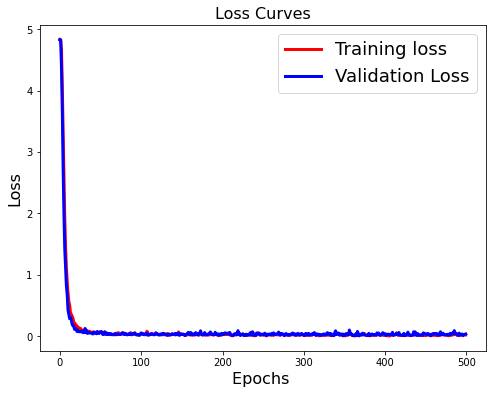

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig('/content/drive/My Drive/Results/Task2/model/loss_mymodel_nm_all.png') 

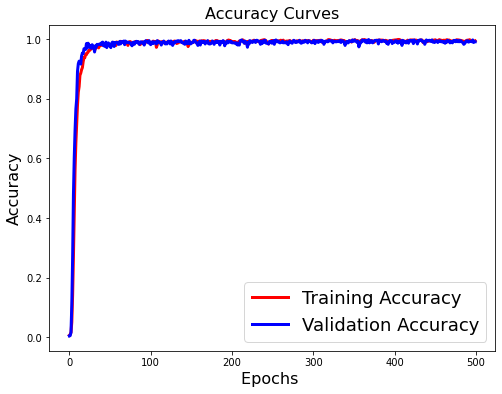

In [ ]:
# Accuracy Curve
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.savefig('/content/drive/My Drive/Results/Task2/model/accuracy_mymodel_nm_all.png') 

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    zca_whitening=True,  # apply ZCA whitening
    rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

datagen.fit(train_images)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:341: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
augmented_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(12,(7,7),activation='relu',strides=(1, 1),input_shape=(32,32,1),padding='same'),
                                  tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'),
                                  tf.keras.layers.Conv2D(28,(5,5),activation='relu',strides=(1, 1),padding='same'),
                                  tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'),
                                  tf.keras.layers.Conv2D(45,(5,5),activation='relu',strides=(1, 1),padding='same'),
                                  tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same'),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1024,activation='relu'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(125,activation='softmax')
                                  ])

In [ ]:
augmented_checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/Results/Task2/augmented/mymodel_gait_augmented_nm_all.h5',  # model filename
                             monitor='val_accuracy', # quantity to monitor
                             verbose=1, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [ ]:
opt = Adam(lr=0.001)
augmented_model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1=augmented_model.fit(train_images,train_labels,validation_split=0.125,callbacks=[augmented_checkpoint],epochs=500,batch_size=128,verbose=2)
augmented_model.evaluate(test_images,test_labels)

Epoch 1/500

Epoch 00001: val_accuracy improved from -inf to 0.01348, saving model to /content/drive/My Drive/Results/Task2/augmented/mymodel_gait_augmented_nm_all.h5
45/45 - 1s - loss: 4.8297 - accuracy: 0.0063 - val_loss: 4.8270 - val_accuracy: 0.0135
Epoch 2/500

Epoch 00002: val_accuracy did not improve from 0.01348
45/45 - 1s - loss: 4.8085 - accuracy: 0.0100 - val_loss: 4.7634 - val_accuracy: 0.0086
Epoch 3/500

Epoch 00003: val_accuracy improved from 0.01348 to 0.03064, saving model to /content/drive/My Drive/Results/Task2/augmented/mymodel_gait_augmented_nm_all.h5
45/45 - 1s - loss: 4.4342 - accuracy: 0.0349 - val_loss: 4.1004 - val_accuracy: 0.0306
Epoch 4/500

Epoch 00004: val_accuracy improved from 0.03064 to 0.18505, saving model to /content/drive/My Drive/Results/Task2/augmented/mymodel_gait_augmented_nm_all.h5
45/45 - 1s - loss: 3.8389 - accuracy: 0.0846 - val_loss: 3.3771 - val_accuracy: 0.1850
Epoch 5/500

Epoch 00005: val_accuracy improved from 0.18505 to 0.30882, savi

[0.09128136932849884, 0.9920294284820557]

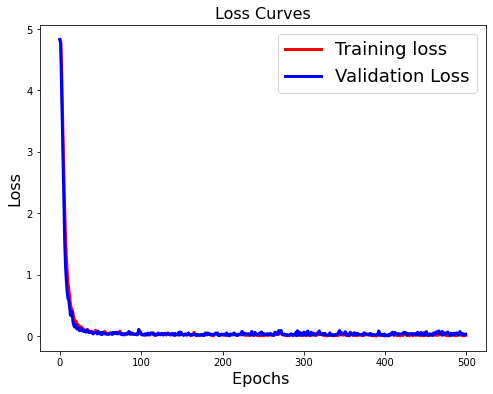

In [ ]:
#LOSS CURVE
plt.figure(figsize=[8,6])
plt.plot(history1.history['loss'],'r',linewidth=3.0)
plt.plot(history1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig('/content/drive/My Drive/Results/Task2/augmented/augmented_loss_mymodel_nm_all.png') 

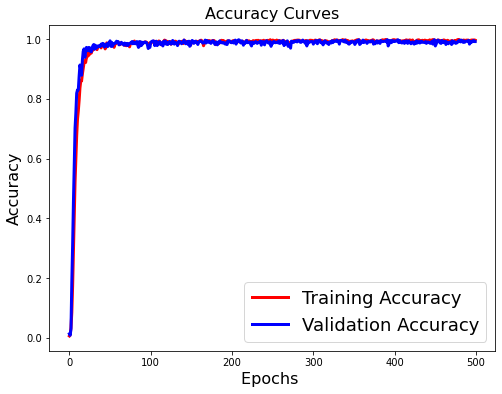

In [ ]:
# Accuracy Curve
plt.figure(figsize=[8,6])
plt.plot(history1.history['accuracy'],'r',linewidth=3.0)
plt.plot(history1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.savefig('/content/drive/My Drive/Results/Task2/augmented/augmented_accuracy_mymodel_nm_all.png') 

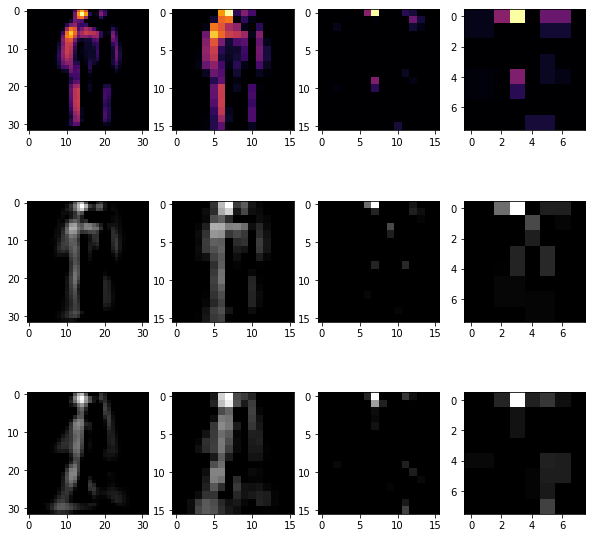

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4,figsize=(10,10))
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in augmented_model.layers]
activation_model = tf.keras.models.Model(inputs = augmented_model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 32, 32, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 32, 32, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 32, 32, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[2,x].grid(False)

In [ ]:
X_test_orig = joblib.load('/content/drive/My Drive/pkl Files/GEI_CASIA_BB_NM_TEST_PKL_FILES/train_images_nm_test_13456_32_018_degree.pkl')
Y_test_orig = joblib.load('/content/drive/My Drive/pkl Files/GEI_CASIA_BB_NM_TEST_PKL_FILES/train_labels_nm_test_13456_32_180_degree.pkl')
print("=========================================================")
print("X_test_orig.shape", X_test_orig.shape)
print("Y_test_orig.shape", Y_test_orig.shape)
 
X_test_orig=X_test_orig.reshape(X_test_orig.shape[0],32,32,1)

model.evaluate(X_test_orig,Y_test_orig)

X_test_orig.shape (124, 32, 32)
Y_test_orig.shape (124,)
4/4 [==============================] - 0s 15ms/step - loss: 1.6288e-06 - accuracy: 1.0000


[1.6288174720102688e-06, 1.0]